PRINCIPAL COMPONANT ANALYSIS

- Python implementation of Principal Componant Analysis

In [14]:
#importing utilites and creating a synthetic dataset
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
X = np.array([[1 , 3, 5,7 , 9 ,13 ,20 , 20, 21, 24 ,26],[5, 7 , 11, 14, 15, 17 , 18 ,19 ,21, 22, 26]])
X = X.T #<-- the data matrix having 11 rows and 2 features
print(X)

[[ 1  5]
 [ 3  7]
 [ 5 11]
 [ 7 14]
 [ 9 15]
 [13 17]
 [20 18]
 [20 19]
 [21 21]
 [24 22]
 [26 26]]


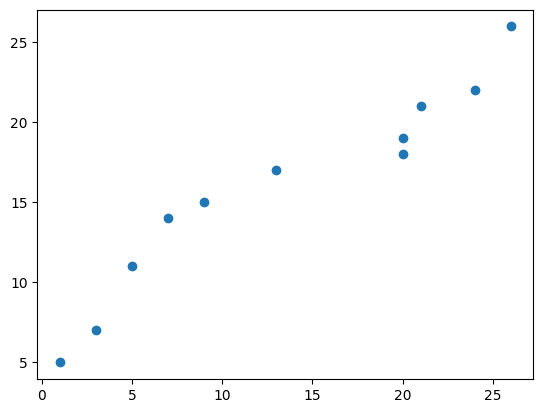

In [21]:
# apply pca to the above 2d data and reduce it to 1 dimentional data
plt.scatter(X[: , 0] ,X[: ,1] ) # plotting  the synthetic dataset

In [5]:
# preprocessing (mean shifting)

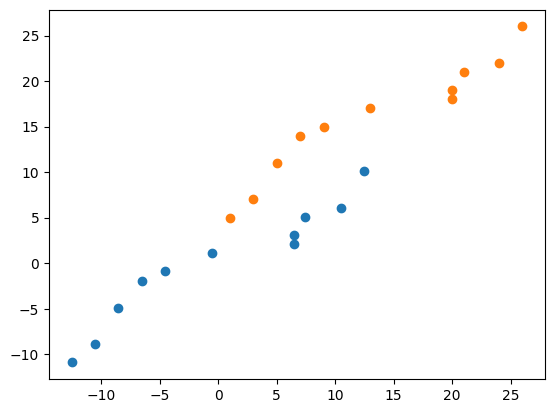

In [19]:
X_meand = X - np.mean(X , axis = 0 )
plt.scatter(X_meand[: ,0] , X_meand[: ,1]) # plotting the mean shifted data
plt.scatter(X[: , 0 ] , X[:, 1]) # comparision
# the blue represents the mean shifted data.

In [23]:
#the covariance matrix

In [24]:
C  = np.cov(X_meand, rowvar=False) 
print(C) #<-- a 2*2 symmetric matrix 

[[80.87272727 54.95454545]
 [54.95454545 40.69090909]]


In [9]:
# computing the eigenvalues and eigenvectors of the covariance matrix 

In [29]:
eval, evec  = np.linalg.eig(C)
print(eval)
print(evec)

[119.29375452   2.26988184]
[[ 0.81956216 -0.57299028]
 [ 0.57299028  0.81956216]]


In [39]:
# sorting eigenvectors based on eigenvalues
sorted_index = np.argsort(eval)[::-1] #  arg sort returns the indices that would sort the array
sorted_eval  = eval[sorted_index]
sorted_evec  = evec[: , sorted_index]
sorted_evec # sorted eigenvectors in order of descending eigenvalues

array([[ 0.81956216, -0.57299028],
       [ 0.57299028,  0.81956216]])

In [43]:
n = 1 # no of eigenvectors we want 
evec_subset = sorted_evec[: , 0:n]
print(evec_subset) # eigenvector corresponding to biggest eigenvalue

[[0.81956216]
 [0.57299028]]


- transform the data

In [44]:
X_reduced = np.dot(evec_subset.transpose() , X.transpose()).transpose()
print(X_reduced) # one dimensional representation of the orignal data

[[ 3.68451355]
 [ 6.46961844]
 [10.40070388]
 [13.75879904]
 [15.97091365]
 [20.39514286]
 [26.70506829]
 [27.27805857]
 [29.24360129]
 [32.27527806]
 [36.2063635 ]]


- reconstruction of data from one eigenvector


In [45]:
# here , all the datapoints will lie on the linear span of the eigenvector.
X_recon = X_reduced.dot(evec_subset.T)
print(X_recon)

[[ 3.0196879   2.11119044]
 [ 5.30225449  3.70702846]
 [ 8.52402338  5.9595022 ]
 [11.27619112  7.88365808]
 [13.08915656  9.15117825]
 [16.71508743 11.68621857]
 [21.88646357 15.3017445 ]
 [22.35606473 15.63006235]
 [23.96694917 16.75629922]
 [26.45159675 18.49342054]
 [29.67336564 20.74589428]]


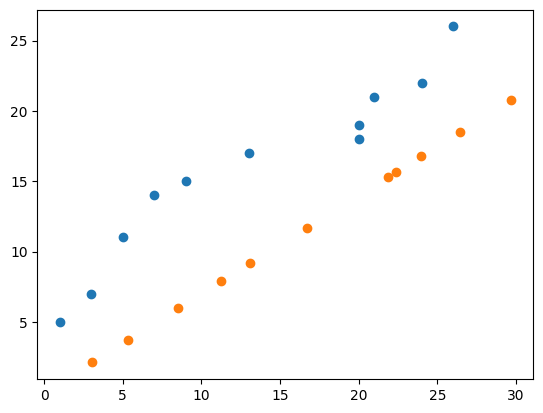

In [46]:
plt.scatter(X[: , 0] , X[: ,1]) #<-- original datapoints
plt.scatter(X_recon[: ,0] , X_recon[: ,1]) #<--1-d representation of the datapoints.

In [63]:
#using direct functionality of sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components = 1) # the arguement is how many dimensions we want to reduce to.

In [72]:
pca.fit(X_meand) #input the shifted data, this method will learn the eigenvalues and eigenvectors

PCA(n_components=1)

In [73]:
Xr = pca.transform(X) # this method will project the original data onto the reduced dimensional space 

In [74]:
Xr # one dimensional representation

array([[ -3.68451355],
       [ -6.46961844],
       [-10.40070388],
       [-13.75879904],
       [-15.97091365],
       [-20.39514286],
       [-26.70506829],
       [-27.27805857],
       [-29.24360129],
       [-32.27527806],
       [-36.2063635 ]])

In [75]:
pca.components_

array([[-0.81956216, -0.57299028]])

In [76]:
pca.components_.T.dot(Xr.T).T 
#reconstruction of the orignal dataset from one eigenvector

array([[ 3.0196879 ,  2.11119044],
       [ 5.30225449,  3.70702846],
       [ 8.52402338,  5.9595022 ],
       [11.27619112,  7.88365808],
       [13.08915656,  9.15117825],
       [16.71508743, 11.68621857],
       [21.88646357, 15.3017445 ],
       [22.35606473, 15.63006235],
       [23.96694917, 16.75629922],
       [26.45159675, 18.49342054],
       [29.67336564, 20.74589428]])

In [77]:
# PCA on the iris dataset 

In [78]:
from sklearn.datasets import load_iris
iris  = pd.DataFrame(load_iris().data , columns=[load_iris().feature_names])
iris_target = pd.DataFrame(load_iris().target , columns = ["class"])
# the iris dataset is a 4d dataset 
# we want to reduce the dimension to 2

In [28]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [80]:
from sklearn.decomposition import PCA
pc_a = PCA(n_components=2)
mean_shifted = np.array(iris)  - np.mean(np.array(iris) , axis =0 )
pc_a.fit(mean_shifted)
l =pc_a.transform(iris)

In [85]:
l[: ,1]

array([5.64634982, 5.14995135, 5.18200315, 5.0086536 , 5.65370709,
       6.06828303, 5.23749119, 5.49033754, 4.74864082, 5.21317833,
       5.97202148, 5.34168252, 5.09184058, 4.81555799, 6.50571721,
       6.66501491, 6.13763209, 5.63880172, 6.19979162, 5.84051289,
       5.71829851, 5.75994864, 5.46042065, 5.42566143, 5.28967072,
       5.1809357 , 5.45790407, 5.69467143, 5.63899256, 5.12999135,
       5.12263409, 5.73787684, 6.1403164 , 6.42009834, 5.20563023,
       5.39631705, 5.9263226 , 5.59559631, 4.83899423, 5.55599641,
       5.59048011, 4.385992  , 4.98502652, 5.51582401, 5.76361572,
       5.07674437, 5.83072372, 5.09900701, 5.9063626 , 5.43465866,
       6.01211305, 5.64528622, 5.83121539, 4.49899357, 5.40154325,
       4.90870571, 5.61042085, 4.32206162, 5.55531448, 4.60387067,
       4.06098139, 5.22297134, 4.77691611, 5.20213472, 5.07209837,
       5.79413207, 4.97398291, 4.99334181, 4.78380703, 4.7431182 ,
       5.24233572, 5.25802755, 4.99916527, 5.14421478, 5.47600

<AxesSubplot: >

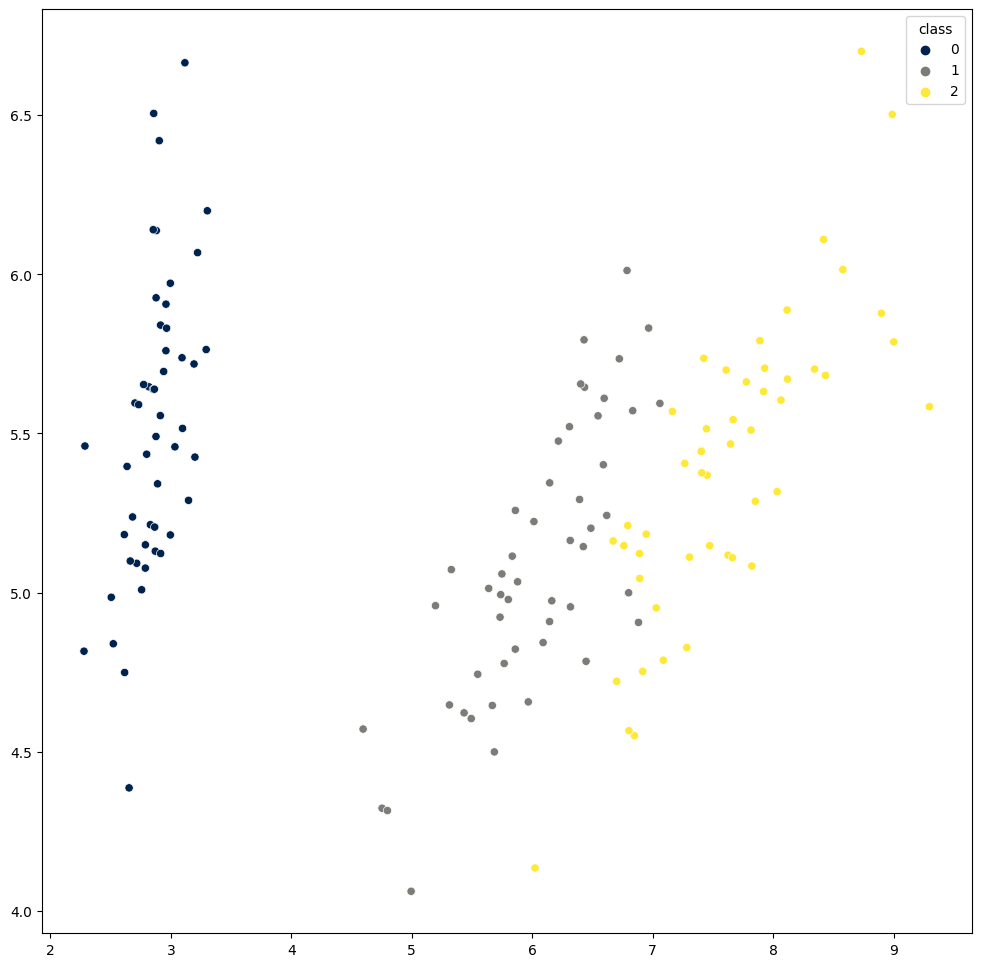

In [92]:
plt.figure(figsize=(12, 12 ))
sns.scatterplot(x = l[: ,0] , y = l[:,1] , hue=iris_target["class"], palette=  "cividis")
#2d representaion of the orignal 4d dataset
# on the horizontal axis we have the first principal component and on the vertical axis we have the second principal componenet.

LINEAR DISCRIMINANT ANALYSIS

In [93]:
c1  = np.matrix([[4,1] , [2 ,4] , [2 , 3 ] , [3 , 6] , [4 ,4]])
c2  = np.matrix([[9,10] , [6 ,8] , [9 ,5 ] , [8,7] , [10 ,8]])

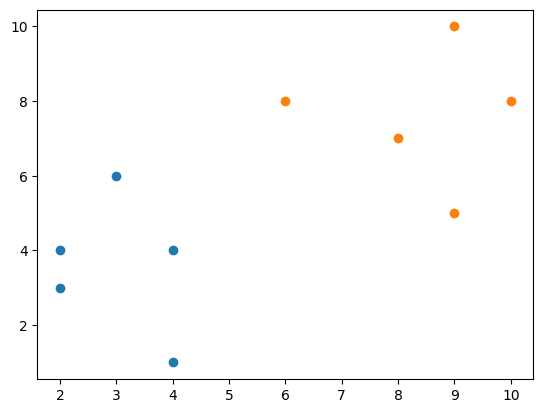

In [94]:
plt.scatter(np.array(c1[:,0]) ,np.array(c1[:,1]))
plt.scatter(np.array(c2[:,0]) ,np.array(c2[:,1]))

In [95]:
mean_vector1 = np.mean(c1 , axis=0) # mean vector for class1
mean_vector2 = np.mean(c2 ,axis =0) # mean vector for class2 

In [96]:
a = np.zeros((2,2))
for i in range(len(c1)):
    a += np.dot(c1[i , :].T - mean_vector1.T , np.transpose(c1[i , :].T - mean_vector1.T))
# variable a contains the class c1 scatter matrix 

In [97]:
b = np.zeros((2,2))
for i in range(len(c2)):
    b += np.dot(c2[i , :].T - mean_vector2.T , np.transpose(c2[i , :].T - mean_vector2.T))
# b contains the class c2 scatter matrix 

In [98]:
sw  = a + b  # sw is the within class scatter matrix 
inv_sw = np.linalg.inv(sw)
opt = np.dot(inv_sw,mean_vector1.T -mean_vector2.T) # gives the  optimal projection direction
print(sw)# the answer is s tallying with this approach
print(opt)

[[13.2 -2.2]
 [-2.2 26.4]]
[[-0.44046095]
 [-0.18822023]]


In [99]:
4 * np.cov(c1 ,rowvar=False) + 4 *np.cov(c2 ,rowvar =False) # and also this also
# (n-1)*cov(c1)  + (n-1) * cov2

array([[13.2, -2.2],
       [-2.2, 26.4]])

- another important thing for LDA  is that we can reduce the data only upto "n-1" dimensions
- where n : no of classess in the dataset
- ex: we have 100d dimensional data with 5 classess we can reduce the dimension of the data only upto 4     dimensions  and not 3, 2 ,1 and so on 

- actual lecture code stars below

In [130]:
#utilities
import numpy as np 
import matplotlib.pyplot as plt 

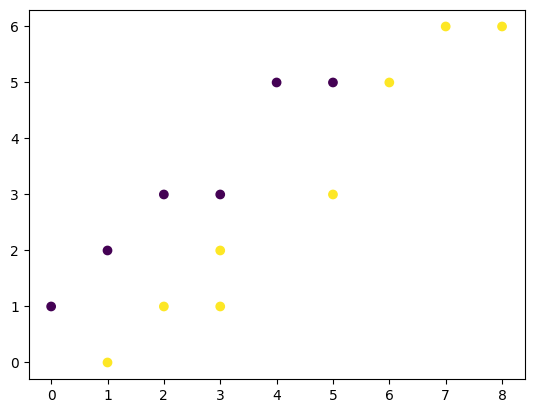

In [131]:
# define a synthetic dataset
X = np.array([[0 ,1 , 2,3, 4, 5, 1,2, 3,3 ,5, 6 , 7, 8],[1, 2, 3, 3, 5,5,0,1,1,2,3,5,6,6]])
y = np.array([0 , 0, 0, 0 , 0, 0 , 1, 1,1,1,1,1,1,1]) 
X = X.T
plt.scatter(X[:, 0], X[:,1] ,c= y) # the c arguement stands for class information

In [132]:
# firt applying pca on this dataset
# and check whether linear seperablity is maintained 

In [133]:
X_meanshift = X - np.mean(X , axis =0)
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X_meanshift)
Xrr = pca.transform(X) # one dimensional represention of the orignal data
dir_pca = pca.components_.T

In [134]:
dir_pca

array([[0.76976202],
       [0.63833097]])

In [135]:
# reconstructing the data from only one eigenvector(projecting data on the direction given by PCA)

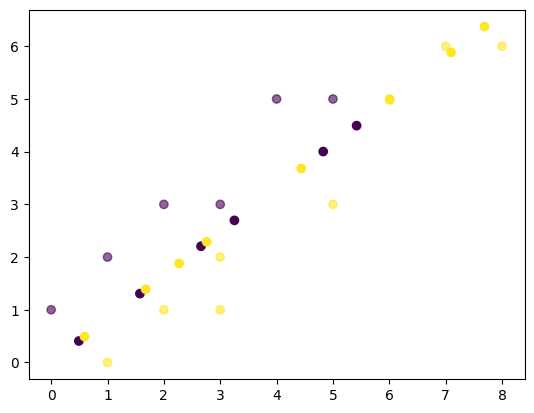

In [136]:
rec_Xrr = dir_pca.dot(Xrr.T).T # reconstructed data 
plt.scatter(X[:, 0], X[:,1] ,c= y , alpha = 0.6) 
plt.scatter(rec_Xrr[:,0] ,rec_Xrr[:,1] ,c =y , alpha = 1)
# we can see that in 1 dimensional representation we are having mixed clusters , we cannot have linerly seperable 
# data after projection , PCA is not preserving linear seprability although the original data is linearly seperable

In [109]:
# to get rid of the problem we will apply LDA

In [141]:
# import utilities 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X , y) # y is the class information

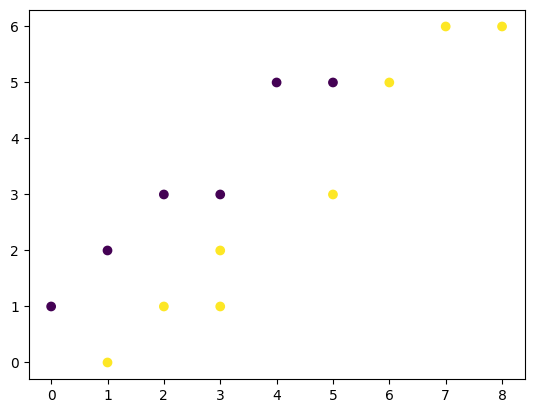

In [142]:
plt.scatter(X[:, 0] , X[:,1], c = y)

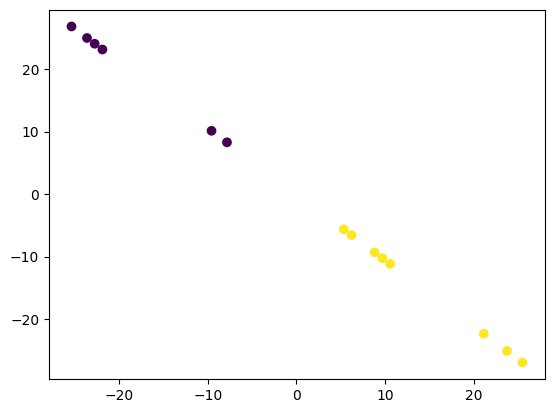

In [143]:
a = lda.coef_.T.dot(X_lda.T).T
plt.scatter(a[:,0] , a[:,1] , c =y)
# we can see that by using the method of linear Discriminat Analysis,
# the linear seperability property of original high dimensional dataset is preserved even after projection
# so in one dimensional representation also the data is linearly seprable

In [145]:
# working on a benchmark dataset 

In [163]:
from sklearn.datasets import load_wine
import pandas as pd 
wine = load_wine()
X =np.array(wine.data)
y =np.array(wine.target)

- the wine dataset is 13 dimensional , we will reduce it to 2 dimensional dataset using LDA.
- (2 is the maximum possible dimension we  can reduce the data upto)

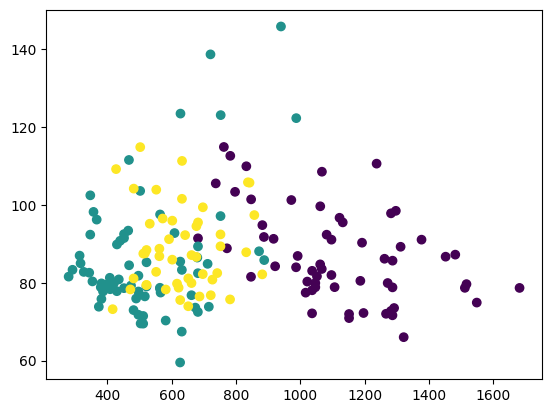

In [167]:
# first applying PCA 
X_meanshifted = X - np.mean(X , axis =0)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_meanshifted)
z=pca.transform(X)# 2d representation using PCA
# plotting the result
plt.scatter(z[:, 0] , z[:, 1], c = y)
# they are claiming that the data in original 13 dimensional spcace is linearly seperable . but after 
# projection it's no longer linearly seperable in 2d space.

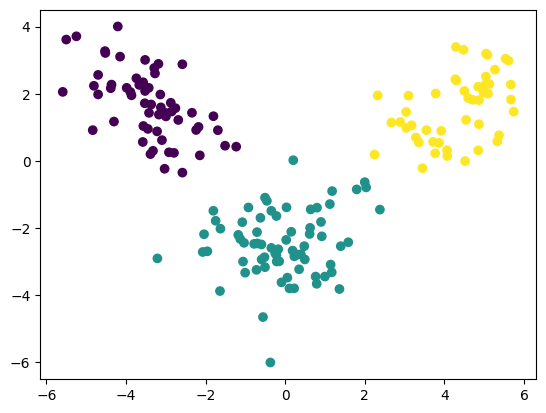

In [168]:
# apply LDA to overcome issue
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X ,y)
Z_lda = lda.transform(X ) # 2d representation using LDA
# plotting the results
plt.scatter(Z_lda[:, 0] ,Z_lda[:, 1],c =y)
# we can see that by using LDA the linearseprablity property is preserved after projection onto 2d space 

In [169]:
# classifying the 2d representation of data  

In [170]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X , y  ,test_size = 0.3)
lda.fit(X_train , y_train)
yn = lda.predict(X_test)

In [171]:
print(y_test)
print(yn)
print(y_test-yn) # ideally should be a sparse vector  

[1 1 1 0 2 0 1 2 1 1 0 2 1 0 0 0 0 2 1 0 0 0 2 0 2 1 2 2 2 0 0 0 1 1 0 0 0
 1 1 2 1 0 0 1 1 2 1 2 2 1 0 1 0 2]
[1 1 1 0 2 0 1 2 1 1 0 2 1 0 0 0 0 2 1 0 0 0 2 0 2 1 2 2 2 0 0 0 1 1 0 0 0
 1 1 2 1 0 0 1 1 2 1 2 2 1 0 1 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
